<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab06_supp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests


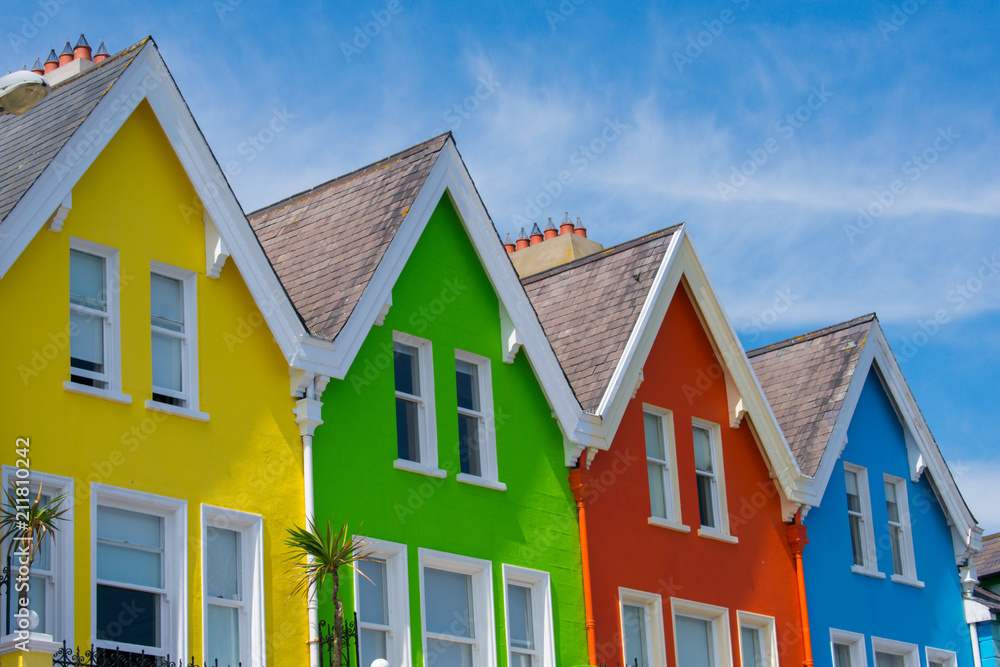

In [2]:
# web image
url = "https://as1.ftcdn.net/v2/jpg/02/11/81/02/1000_F_211810242_jcCTf5ArZua0N58KDdZQWMFJKwpvE96n.jpg"
I = Image.open(requests.get(url, stream=True).raw).convert("RGB")
I

In [3]:
X = np.transpose(np.array(I.resize((64,64))),(2,0,1))
X.shape

(3, 64, 64)

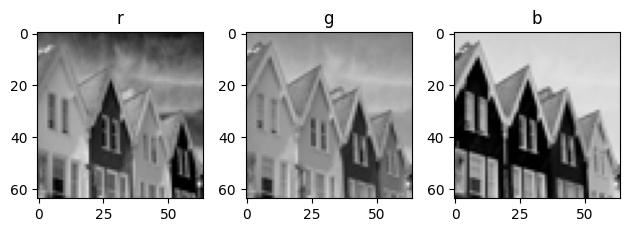

In [4]:
cname =['r','g','b']
for n in range(3):
  plt.subplot(1,3,n+1)
  plt.imshow(X[n],cmap='gray',vmin=0,vmax=255)
  plt.title(cname[n])
#  plt.colorbar()
plt.tight_layout()
plt.show()

- 학습이 이미 진행된 CNN model을 가져오기.

In [5]:
vgg11 = torchvision.models.vgg11(weights="IMAGENET1K_V1")
vgg11.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [6]:
print(vgg11)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

- 학습이 완료된 CNN model의 layer를 하나씩 통과하면서 입력영상이 어떻게 변해가는지를 관찰해보자.

In [7]:
X = torch.tensor(X).unsqueeze(0).type(torch.FloatTensor)
X.shape

torch.Size([1, 3, 64, 64])

In [8]:
H1 = vgg11.features[0](X)
H1.shape

torch.Size([1, 64, 64, 64])

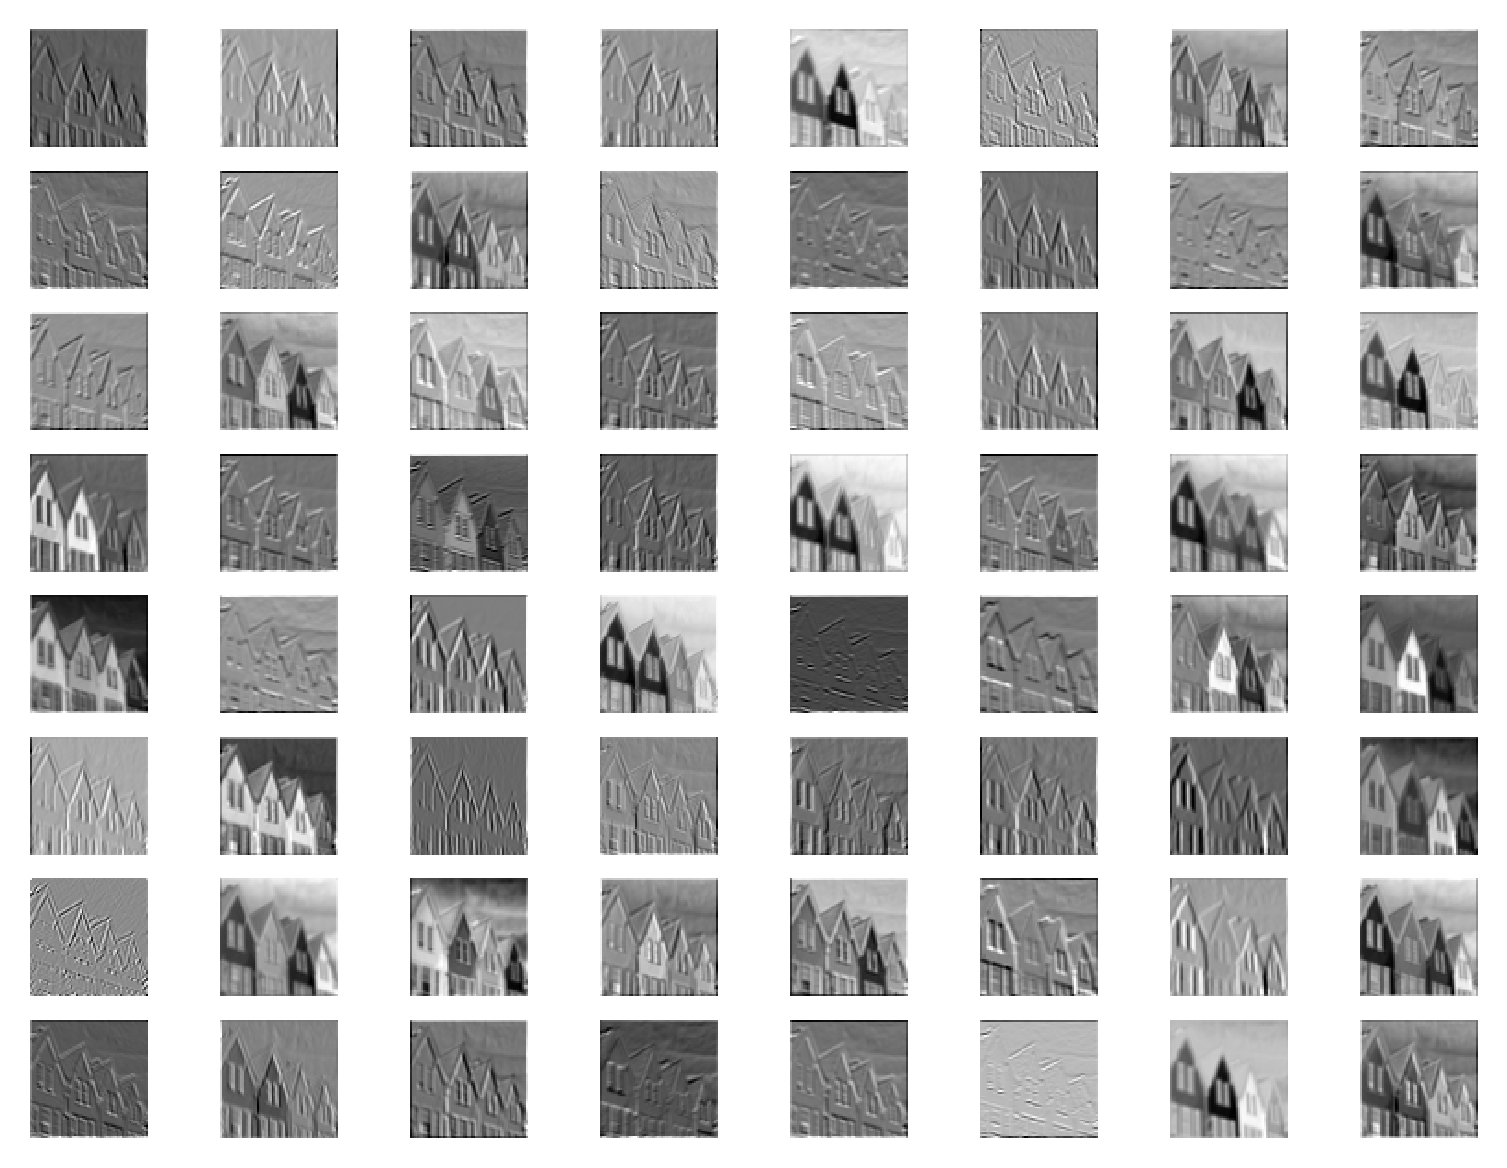

In [9]:
plt.figure(dpi=300)
for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(H1[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()

In [10]:
H1_relu = vgg11.features[1](H1)
H1_relu.shape

torch.Size([1, 64, 64, 64])

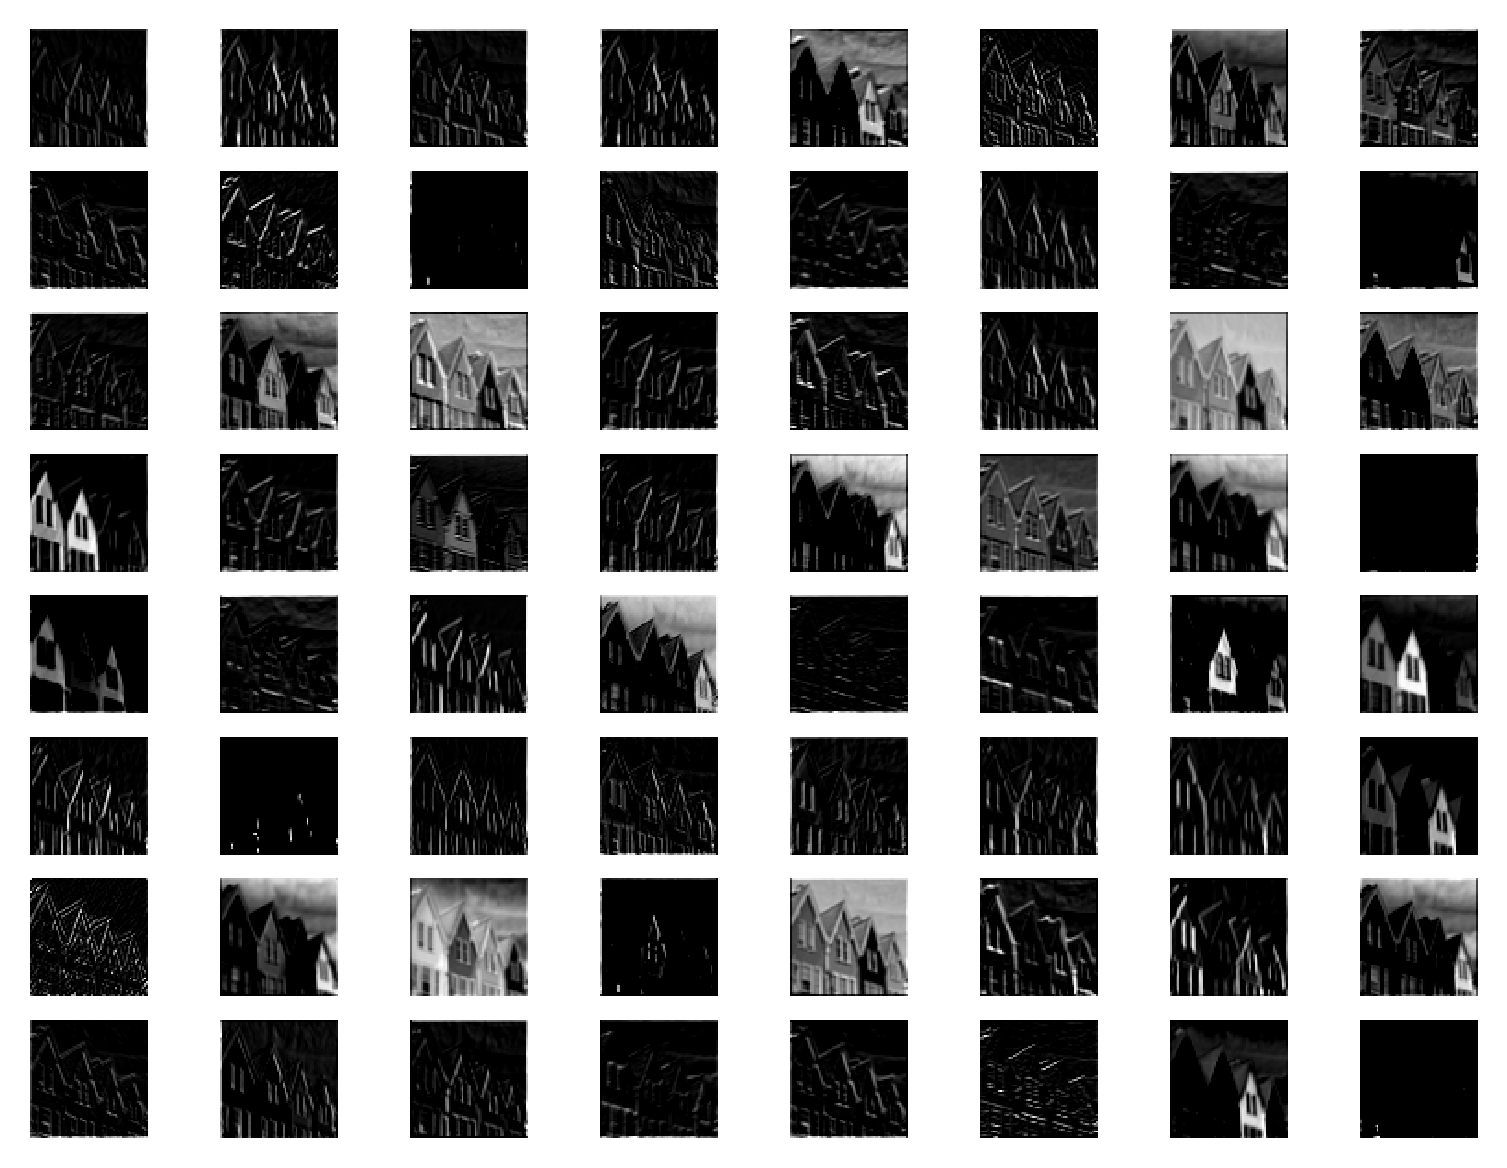

In [11]:
plt.figure(dpi=300)
for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(H1_relu[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()

In [12]:
H1_relu_maxpool = vgg11.features[2](H1_relu)
H1_relu_maxpool.shape

torch.Size([1, 64, 32, 32])

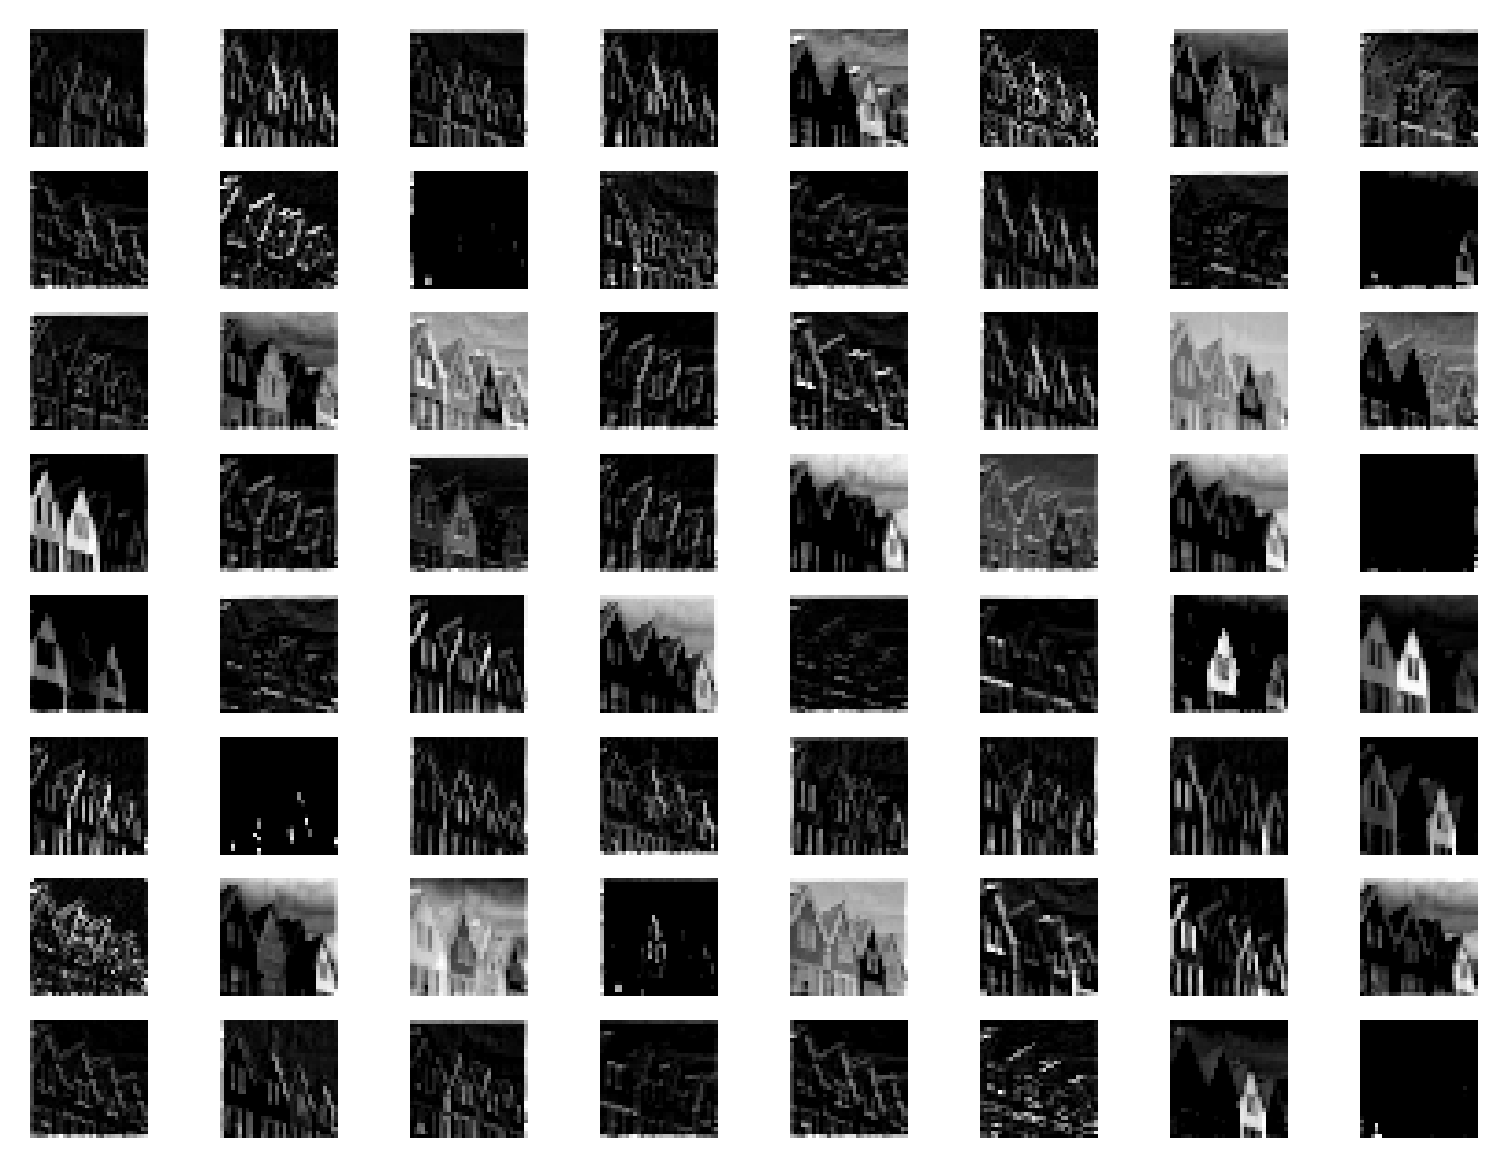

In [13]:
plt.figure(dpi=300)
for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(H1_relu_maxpool[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()

In [14]:
H2 = vgg11.features[3](H1_relu_maxpool)
H2.shape

torch.Size([1, 128, 32, 32])

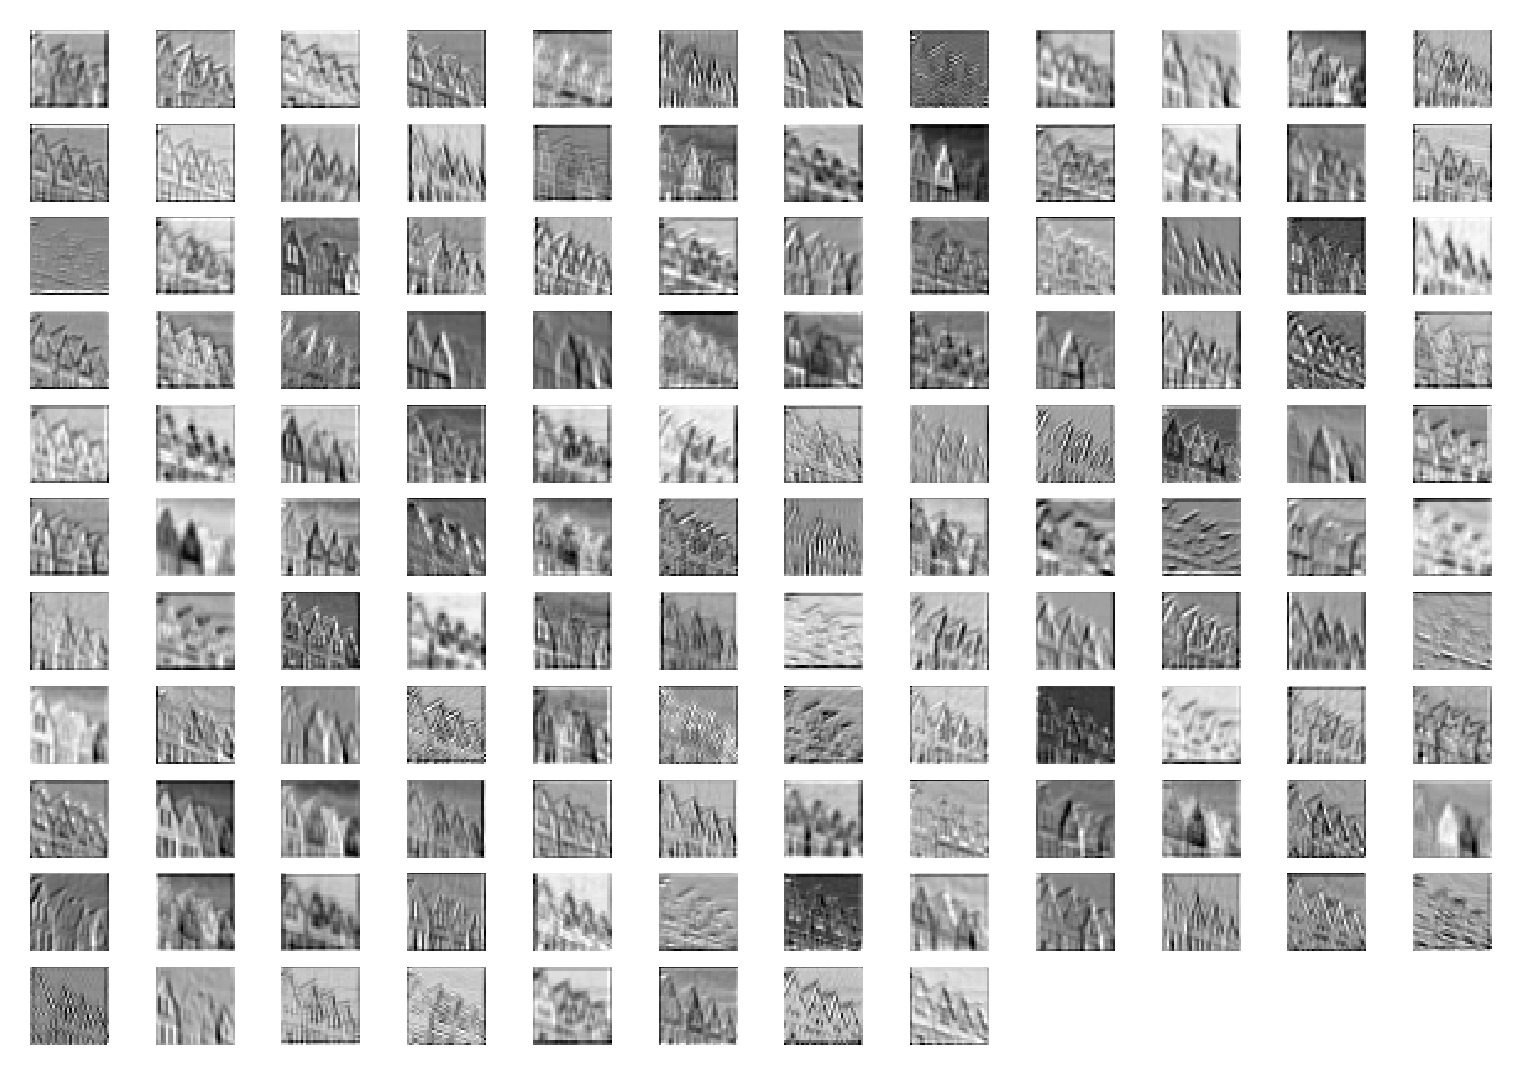

In [15]:
plt.figure(dpi=300)
for n in range(128):
  plt.subplot(12,12,n+1)
  plt.imshow(H2[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()

In [16]:
H2_relu = vgg11.features[4](H2)
H2_relu.shape

torch.Size([1, 128, 32, 32])

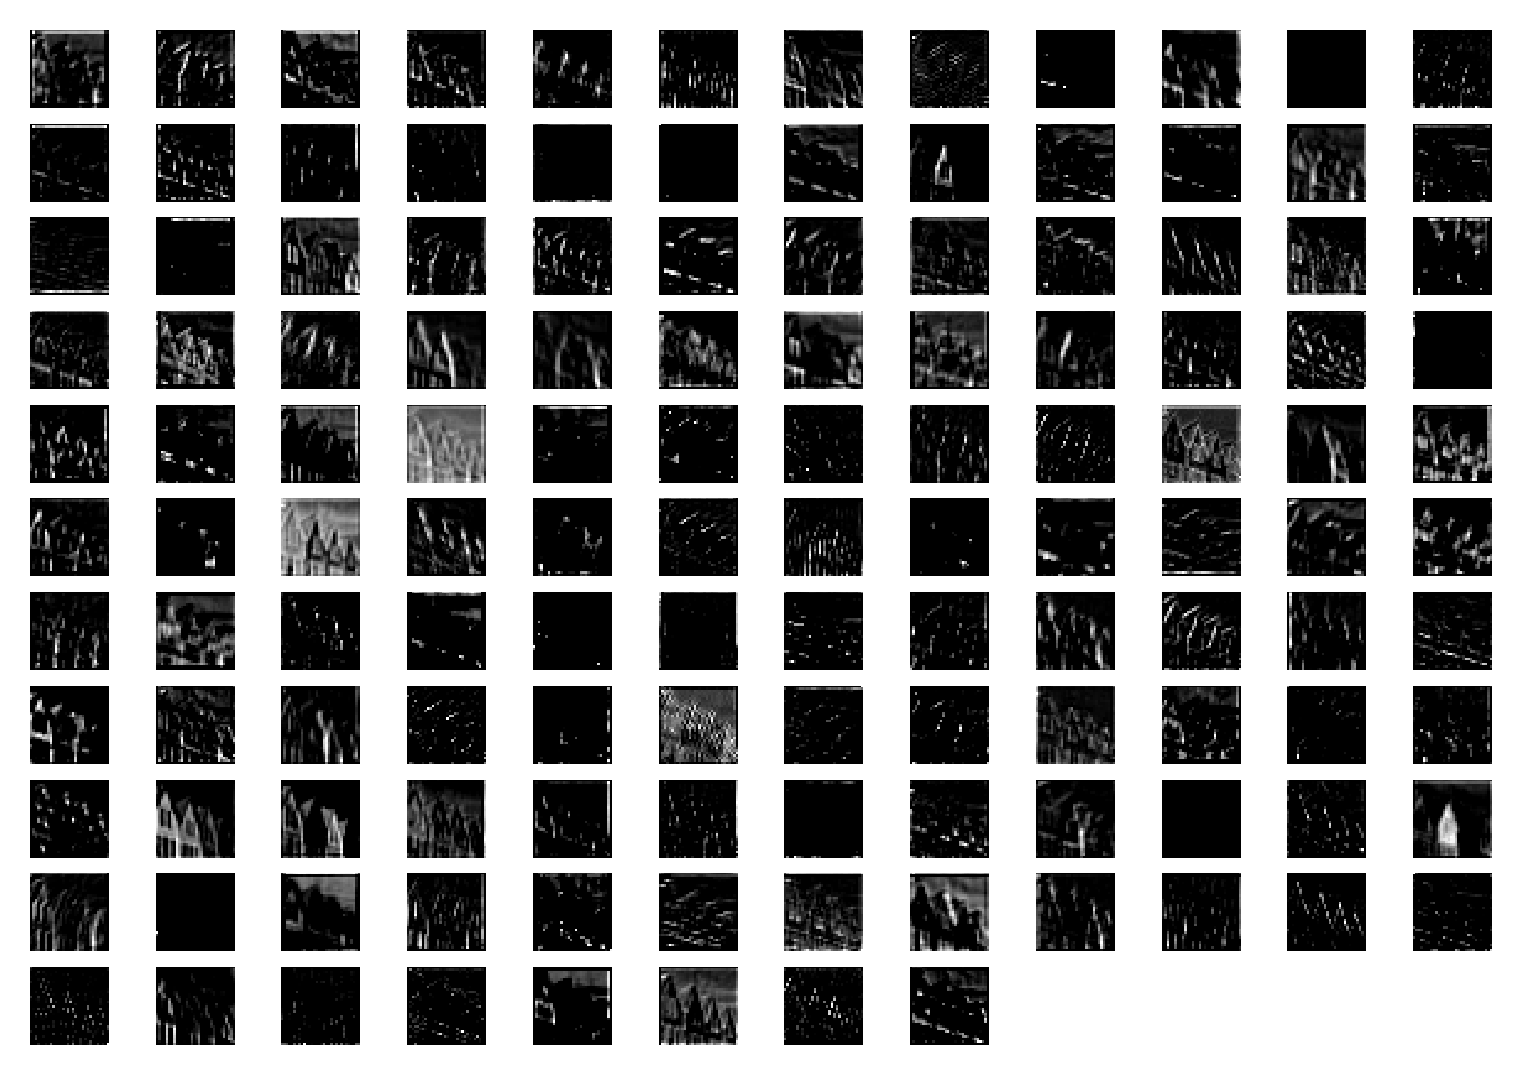

In [17]:
plt.figure(dpi=300)
for n in range(128):
  plt.subplot(12,12,n+1)
  plt.imshow(H2_relu[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()

In [18]:
H2_relu_maxpool = vgg11.features[5](H2_relu)
H2_relu_maxpool.shape

torch.Size([1, 128, 16, 16])

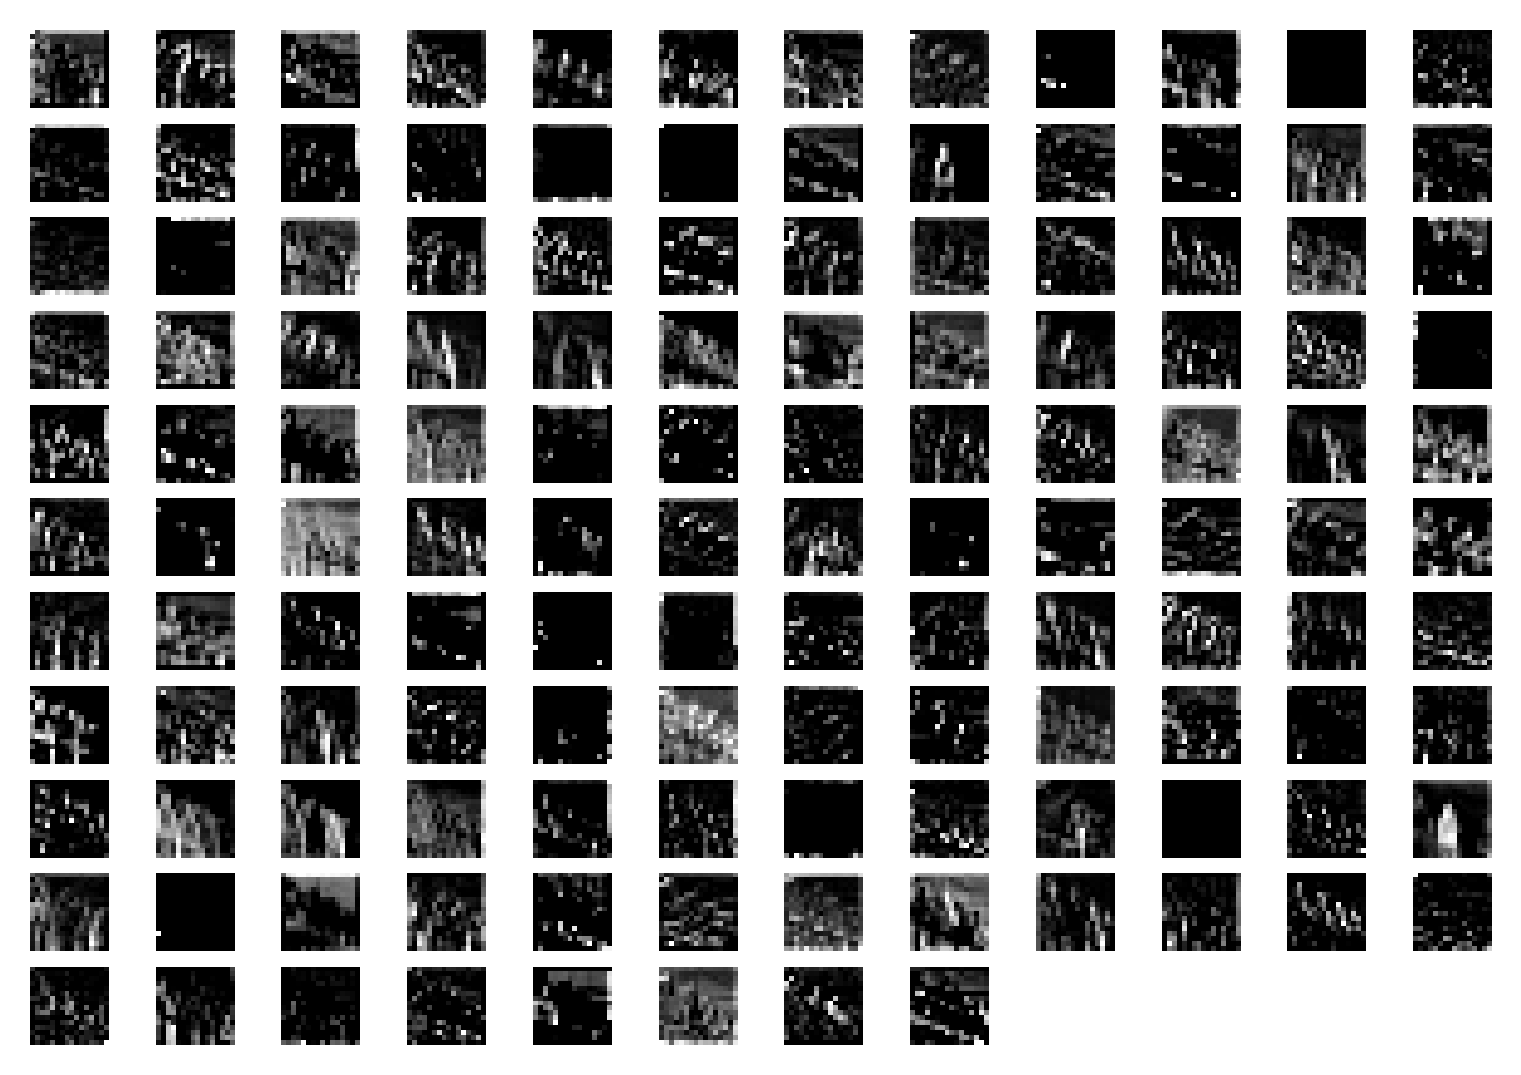

In [19]:
plt.figure(dpi=300)
for n in range(128):
  plt.subplot(12,12,n+1)
  plt.imshow(H2_relu_maxpool[0,n].detach().numpy(),cmap='gray',interpolation='nearest')
  plt.axis('off')
plt.show()